In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("/home/shared/sp18-is590dv/data/IL_Building_Inventory.csv",
           na_values = {'Year Acquired': 0, 'Year Constructed': 0, 'Square Footage': 0, 'Total Floors': 0})

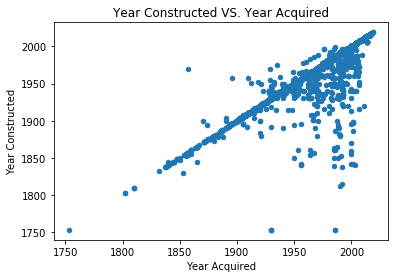

In [3]:
df.plot(x='Year Acquired', y='Year Constructed', kind='scatter', title='Year Constructed VS. Year Acquired')

# Summary of the approach:

# Success: 
# Scatter plots show very clearly about the rough correlation between two variables when
# there is a large amount of data. From this perspective, it's better than using lines here. 
# It also gives the comprehensive distribution of two variable including outliers.

# Shortcomings:
# When data is too much, the dots just cover each other and we can't see the exact density.
# Then we don't know exactly how many points deviate from the majority.


In [4]:
y = df.groupby("Congress Dist")["Square Footage"].sum()

In [5]:
x = list(df.groupby("Congress Dist").groups.keys())

Text(0.5,1,'Total Square Footage VS. Congressional District')

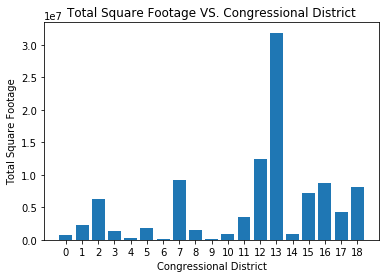

In [6]:
#plt.scatter(x, y)
plt.bar(x, y)
xi = [x[i] for i in range(len(x))]
plt.xticks(xi, x)
plt.xlabel("Congressional District")
plt.ylabel("Total Square Footage")
plt.title("Total Square Footage VS. Congressional District")
# 
# Summary of the approach:

# Success:
# It shows clearly about the total square footage for each district and 
# we can directly compare them by the visualization.
# 
# Shortcomings:
# The change of square footage along with the district is not as clear
# as using line plot.

In [7]:
df_tmp = df
df_tmp["square footage per floor"]=df["Square Footage"]/df['Total Floors']

Text(0.5,1,'Average Square Footage per Floor VS. Congressional District')

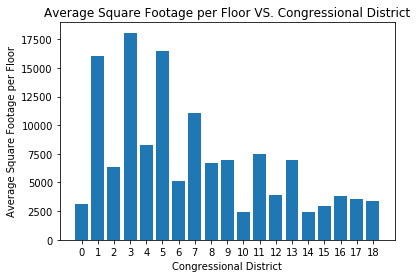

In [8]:
z = df_tmp.groupby("Congress Dist")["square footage per floor"].mean()
plt.bar(x, z)
xi = [x[i] for i in range(len(x))]
plt.xticks(xi, x)
plt.xlabel("Congressional District")
plt.ylabel("Average Square Footage per Floor")
plt.title("Average Square Footage per Floor VS. Congressional District")
# 
# Summary of the approach:

# Success:
# It shows clearly about the Average Square Footage per Floor for 
# each district and we can directly compare them by the visualization.
# 
# Shortcomings:
# The change of square footage along with the district is not as clear
# as using line plot.

In [9]:
stats = df.groupby('Agency Name')['Agency Name'].count().sort_values(ascending=False)
name_list = stats.head(5).index

Text(0.5,1,'Square Footage for the Five Most Common Departments VS. Year')

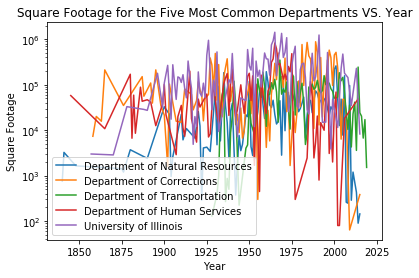

In [10]:
for name in name_list:
    df_chosen = df[df['Agency Name'] == name]
    ans = df_chosen.groupby("Year Acquired")["Square Footage"].sum()
    plt.plot(ans, label=name)
plt.legend()
plt.yscale("log")
plt.xlabel('Year')
plt.ylabel('Square Footage')
plt.title('Square Footage for the Five Most Common Departments VS. Year')
# 
# Summary of the approach:

# Success:
# It shows clearly about how Square Footage change along with year.
# And it identifies situations of five departments with one line so
# it's easy to compare them through the visualization. Logarithm
# scale is useful to make the change of lines seem more steady which
# helps make situations for small square footage more clearly.
# 
# Shortcomings:
# Because of lines tangling in some parts, it's not so transparent 
# for some years.Also, it's hard to identify some specific values from
# the plot.